# Feature Engineering
## Einfuehrung
## Exploration
## Transformation
## Konstruktion
## Selektion
### Automatische Feature Selektion

In [2]:
## preparation: import libraries and read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

datapath = '../3_data'
from os import chdir; chdir(datapath)

data = pd.read_csv('bank_data.csv', sep=';')

#### Univariate Methoden

In [4]:
## remove rows with missing values
tmp_data = data.dropna()

## features - target - split
X = tmp_data.drop('y', axis=1)
y = tmp_data['y']

## numerical features only
X = X._get_numeric_data()

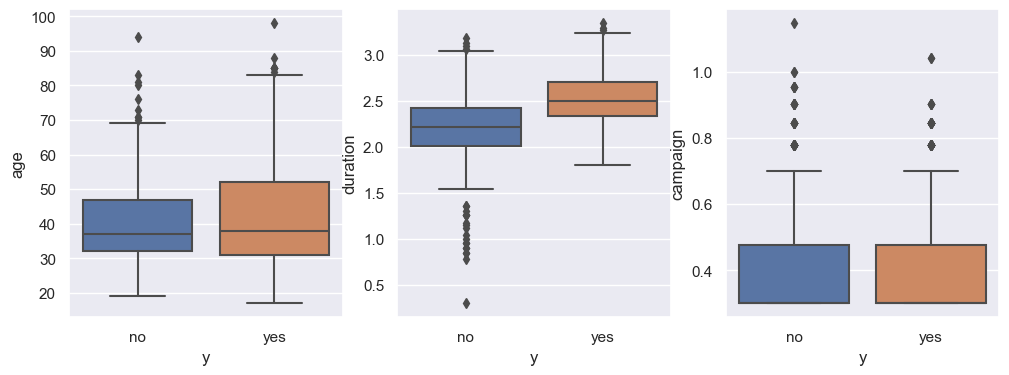

In [5]:
## grouped boxplots
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=False)
sns.boxplot(x=y, y=tmp_data['age'], ax=axes[0])
sns.boxplot(x=y, y=np.log10(tmp_data['duration'] + 1), ax=axes[1])
sns.boxplot(x=y, y=np.log10(tmp_data['campaign'] + 1), ax=axes[2]);

In [6]:
## ANOVA (Analysis of variance) for three selected features
import scipy.stats as stats
print('F-Statistik')
print('age      :',
      stats.f_oneway(tmp_data['age'][y == 'yes'], tmp_data['age'][y == 'no'])[0])
print(
    'duration :',
    stats.f_oneway(tmp_data['duration'][y == 'yes'],
                   tmp_data['duration'][y == 'no'])[0])
print(
    'campaign :',
    stats.f_oneway(tmp_data['campaign'][y == 'yes'],
                   tmp_data['campaign'][y == 'no'])[0])

F-Statistik
age      : 12.549987176912808
duration : 191.69044031601936
campaign : 12.366212567906711


In [7]:
## identify the 5 most important features, using sklearn.feature_selection.SelectKBest
from sklearn.feature_selection import SelectKBest
select = SelectKBest(k=5)
select.fit(X, y)
mask = select.get_support()
## check
print(pd.DataFrame({
    'index': X.columns,
    'mask': pd.Series(mask)}))

            index   mask
0             age  False
1        duration   True
2        campaign  False
3           pdays   True
4        previous  False
5    emp.var.rate  False
6  cons.price.idx  False
7   cons.conf.idx   True
8       euribor3m   True
9     nr.employed   True


In [8]:
## use _mask_ as filter criteria
X_red = X.loc[:, mask]
print(X_red.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1832 entries, 10 to 9867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   duration       1832 non-null   float64
 1   pdays          1832 non-null   int64  
 2   cons.conf.idx  1832 non-null   float64
 3   euribor3m      1832 non-null   float64
 4   nr.employed    1832 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 85.9 KB
None


#### Modellbasierte Feature Selektion

vgl. Präs. und FE_7_Nachträge

#### Iterative Feature Selektion

vgl. Präs. und FE_7_Nachträge

### Feature Selektion mit Expertenwissen

vgl. Präs. und FE_7_Nachträge